# 2018/2019 - Task List 1

1. Generate random variable from prefered dystribution using Pyro (pyro.sample)
    
    - animate how distribution of values changes
    - animate histograms of values
    - start with empty list of values, generate new samples, generate histogram
    
    
2. Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

    - it must be a simulator!
    - sample from distribution using given probabilities
    - repeate experiment and compare with Bayes equation


## Required imports

In [2]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

## Generating single value from normal distribution with given mean and variance

In [2]:
mean = 0
variance = 10
x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
print(x)

tensor(-10.5315)


## Sampling from categorical probabilities with given probabilities

In [3]:
x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([0.5, 0.5])))
print(x)

tensor(1)


## Animating data

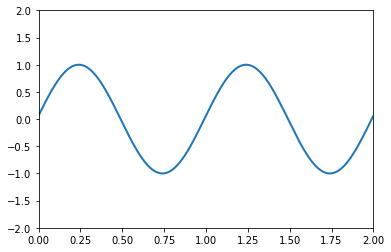

In [4]:
def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # animation function. This is called sequentially
    def sin(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin, init_func=init,
                                   frames=100, interval=20, blit=True)
    return HTML(anim.to_jshtml())

animate()

## Drawing histogram

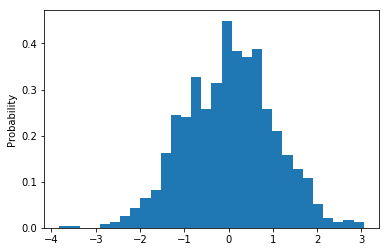

In [5]:
x = np.random.normal(size = 1000)
plt.hist(x, density=True, bins=30)
plt.ylabel('Probability');

## Task 1

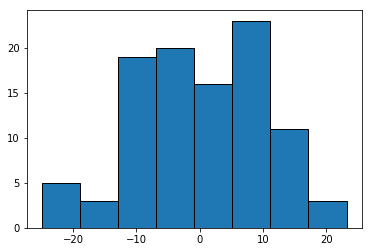

In [13]:
#1. Generate random variable from prefered dystribution using Pyro (pyro.sample)
    
#    - animate how distribution of values changes
#    - animate histograms of values
#    - start with empty list of values, generate new samples, generate histogram

mean = 0
variance = 10
number = 100

def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    ax.set_xlim(( -5, 5))
    ax.set_ylim((0, 5))

    line, = ax.plot([], [], lw=2)
    
    data = []
    
    # animation function. This is called sequentially
    def update_hist(num, mean):
        x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
        data.append(x)
        plt.cla()
        plt.hist(data, bins='auto', edgecolor='black')

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, update_hist, init_func=init,
                                   frames = number, interval=200, blit=False, fargs = (mean,))
    return HTML(anim.to_jshtml())

animate()




## Task 2

In [7]:
# 2. Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease.
# We know that it affects from about 1 to 100 out of 50,000 people. 
# There was developed a test to check whether the person has the disease and it is quite accurate:
# the probability that the test result is positive (suggesting the person has the disease),
# given that the person does not have the disease, is only 2 percent;
# the probability that the test result is negative (suggesting the person does not have the disease),
# given that the person has the disease, is only 1 percent.
# When a random person gets tested for the disease and the result comes back positive,
# what is the probability that the person has the disease? Check whole parameter space and visualise results.

#     - it must be a simulator!
#     - sample from distribution using given probabilities
#     - repeate experiment and compare with Bayes equation

Populacja:  50000


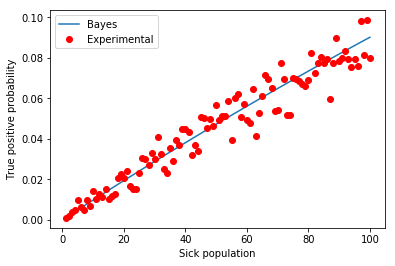

In [12]:
# I - osoba chora
# H - osoba zdrowa
# + - wynik testu pozytywny
# - - wynik testu negatywny

population_amount = 50000

ill = 100

# P(I) = 0.01
ill_people_prob = ill/population_amount

# P(H) = 1 - 0.01 = 0.99
healthy_people_prob = 1 - ill_people_prob

# P(+|H) = 0.02
positive_healthy_prob = 0.02
# P(-|H) = 0.98
negative_healthy_prob = 1 - positive_healthy_prob

# P(-|I) = 0.01
negative_ill_prob = 0.01
# P(+|I) = 0.99
positive_ill_prob = 1 - negative_ill_prob


# P(+|I) = 1 - P(-|I) = 1 - 0.01 = 0.99

def generate_population(population_amount, ill_people_prob, positive_ill_prob, positive_healthy_prob, negative_healthy_prob):
    pos_ill = 0
    pos_healthy = 0
    neg_ill = 0
    neg_healthy = 0
    
    for i in range(population_amount):
        population_temp = pyro.sample("categorical_sampling", pyro.distributions.Categorical(probs = torch.tensor([1 - ill_people_prob, ill_people_prob])))
        if population_temp > 0:
            population_pos = pyro.sample("categorical_sampling", pyro.distributions.Categorical(probs = torch.tensor([1 - positive_ill_prob, positive_ill_prob])))
            if population_pos > 0:
                pos_ill+=1
            else:
                neg_ill+=1
        else:
            population_neg = pyro.sample("categorical_sampling", pyro.distributions.Categorical(probs = torch.tensor([negative_healthy_prob, 1 - negative_healthy_prob])))
            if population_neg > 0:
                pos_healthy+=1
            else:
                neg_healthy+=1

    return pos_ill, pos_healthy, neg_ill, neg_healthy

def bayes_equation(ill_people_prob, positive_healthy_prob, positive_ill_prob, healthy_people_prob):
#     P(I|+) = (P(I) * P(+|I)) / P(+) = (P(I) * P(+|I)) / (P(+|I) * P(I) + P(+|H)*P(H))
    ill_positive_prob = 0
    ill_positive_prob = (ill_people_prob * positive_ill_prob) / (positive_ill_prob * ill_people_prob + positive_healthy_prob * healthy_people_prob)
    return ill_positive_prob

def samples_experiment(population_amount, ill_people_prob, positive_ill_prob, positive_healthy_prob, negative_healthy_prob):
    pos_ill, pos_healthy, neg_ill, neg_healthy = generate_population(population_amount, ill_people_prob, positive_ill_prob, positive_healthy_prob, negative_healthy_prob)
    return pos_ill, pos_healthy, neg_ill, neg_healthy

print('Populacja: ', population_amount)
bayes_list = []
experimental_list = []

for i in range(1,101):
    ill_people_prob = i/population_amount
    bayes = bayes_equation(ill_people_prob, positive_healthy_prob, positive_ill_prob, healthy_people_prob)
    bayes_list.append((i,bayes))
    pos_ill, pos_healthy, neg_ill, neg_healthy = samples_experiment(population_amount, ill_people_prob, positive_ill_prob, positive_healthy_prob, negative_healthy_prob)
    experimental_result = pos_ill/(pos_ill+pos_healthy)
    experimental_list.append((i,experimental_result))
#     print('Ill: ', i, ' | Bayes:', bayes, ' | Experiment: ', pos_ill/(pos_ill+pos_healthy))

q,w = zip(*bayes_list)
e,r = zip(*experimental_list)
plt.plot(q,w, label = 'Bayes')
plt.plot(e,r, 'ro', label = 'Experimental')
plt.ylabel('True positive probability')
plt.xlabel('Sick population')
plt.legend(loc = 'best')
plt.show()